In [1]:
import pandas as pd
import numpy as np

import covasim as cv
cv.options.set(dpi=100, show=False, close=True, verbose=0) # Standard options for Jupyter notebook

Covasim 3.0.7 (2021-06-29) — © 2021 by IDM


In [2]:
pars = dict(
    pop_size  = 20_000,
    start_day = '2020-02-01',
    end_day   = '2020-04-11',
    beta      = 0.015,
)

In [3]:
example_data = "/mnt/d/books/iitm/agentBased/codes/covasim/docs/tutorials/example_data.csv"

In [4]:
df = pd.read_csv(example_data)
df.head()

,date,new_diagnoses,new_tests,new_deaths
0,2020-03-01,1,24,0
1,2020-03-02,3,22,0
2,2020-03-03,2,15,0
3,2020-03-04,8,40,0
4,2020-03-05,20,38,0


In [23]:
sim = cv.Sim(pars=pars, datafile=example_data, interventions=cv.test_num(daily_tests='data'))

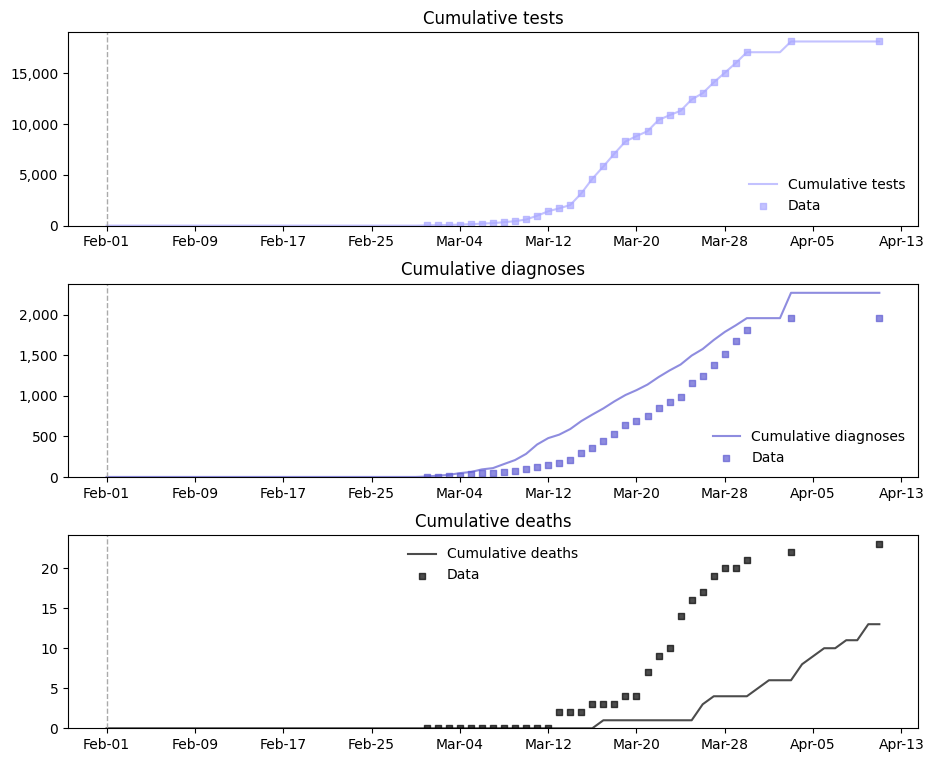

In [24]:
sim.run()
sim.plot(to_plot=['cum_tests', 'cum_diagnoses', 'cum_deaths'])

In [18]:
sim.result_keys()

['cum_infections',
 'cum_reinfections',
 'cum_infectious',
 'cum_symptomatic',
 'cum_severe',
 'cum_critical',
 'cum_recoveries',
 'cum_deaths',
 'cum_tests',
 'cum_diagnoses',
 'cum_known_deaths',
 'cum_quarantined',
 'cum_vaccinations',
 'cum_vaccinated',
 'new_infections',
 'new_reinfections',
 'new_infectious',
 'new_symptomatic',
 'new_severe',
 'new_critical',
 'new_recoveries',
 'new_deaths',
 'new_tests',
 'new_diagnoses',
 'new_known_deaths',
 'new_quarantined',
 'new_vaccinations',
 'new_vaccinated',
 'n_susceptible',
 'n_exposed',
 'n_infectious',
 'n_symptomatic',
 'n_severe',
 'n_critical',
 'n_recovered',
 'n_dead',
 'n_diagnosed',
 'n_known_dead',
 'n_quarantined',
 'n_vaccinated',
 'n_alive',
 'n_naive',
 'n_preinfectious',
 'n_removed',
 'prevalence',
 'incidence',
 'r_eff',
 'doubling_time',
 'test_yield',
 'rel_test_yield',
 'frac_vaccinated',
 'pop_nabs',
 'pop_protection',
 'pop_symp_protection']

In [29]:
fit = sim.compute_fit()   #  normalized absolute difference. why normalized ?
                        # how are they calculating 
print(fit.mismatches)

#0. cum_deaths:    75.65217391304347
#1. cum_tests:     0.0
#2. cum_diagnoses: 20.699693564862102


In [30]:
print(fit.mismatch)

96.35186747790557


In [34]:
sim.results['cum_diagnoses'].values

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    5.,   16.,   25.,   47.,   61.,   93.,  109.,
        159.,  208.,  284.,  400.,  478.,  521.,  590.,  688.,  768.,
        844.,  931., 1009., 1069., 1138., 1230., 1312., 1385., 1495.,
       1576., 1687., 1786., 1868., 1956., 1956., 1956., 1956., 2268.,
       2268., 2268., 2268., 2268., 2268., 2268., 2268., 2268.])

In [36]:
v = df['new_diagnoses']

In [38]:
sum(v)

1958

In [ ]:
# calibrate

In [55]:
# rel_death_prob calibration
for dp in range(1,5):
    sim['rel_death_prob'] = dp
    sim.initialize(reset=True) 
    sim.run()
    fit = sim.compute_fit()
    print(f'dp: {dp} mismatch: {fit.mismatch}')

dp: 1 mismatch: 96.35186747790557
dp: 2 mismatch: 59.316072300928184
dp: 3 mismatch: 59.09213039037172
dp: 4 mismatch: 58.39687791446463


#0. cum_deaths:    36.95652173913043
#1. cum_tests:     0.0
#2. cum_diagnoses: 22.359550561797754
59.316072300928184


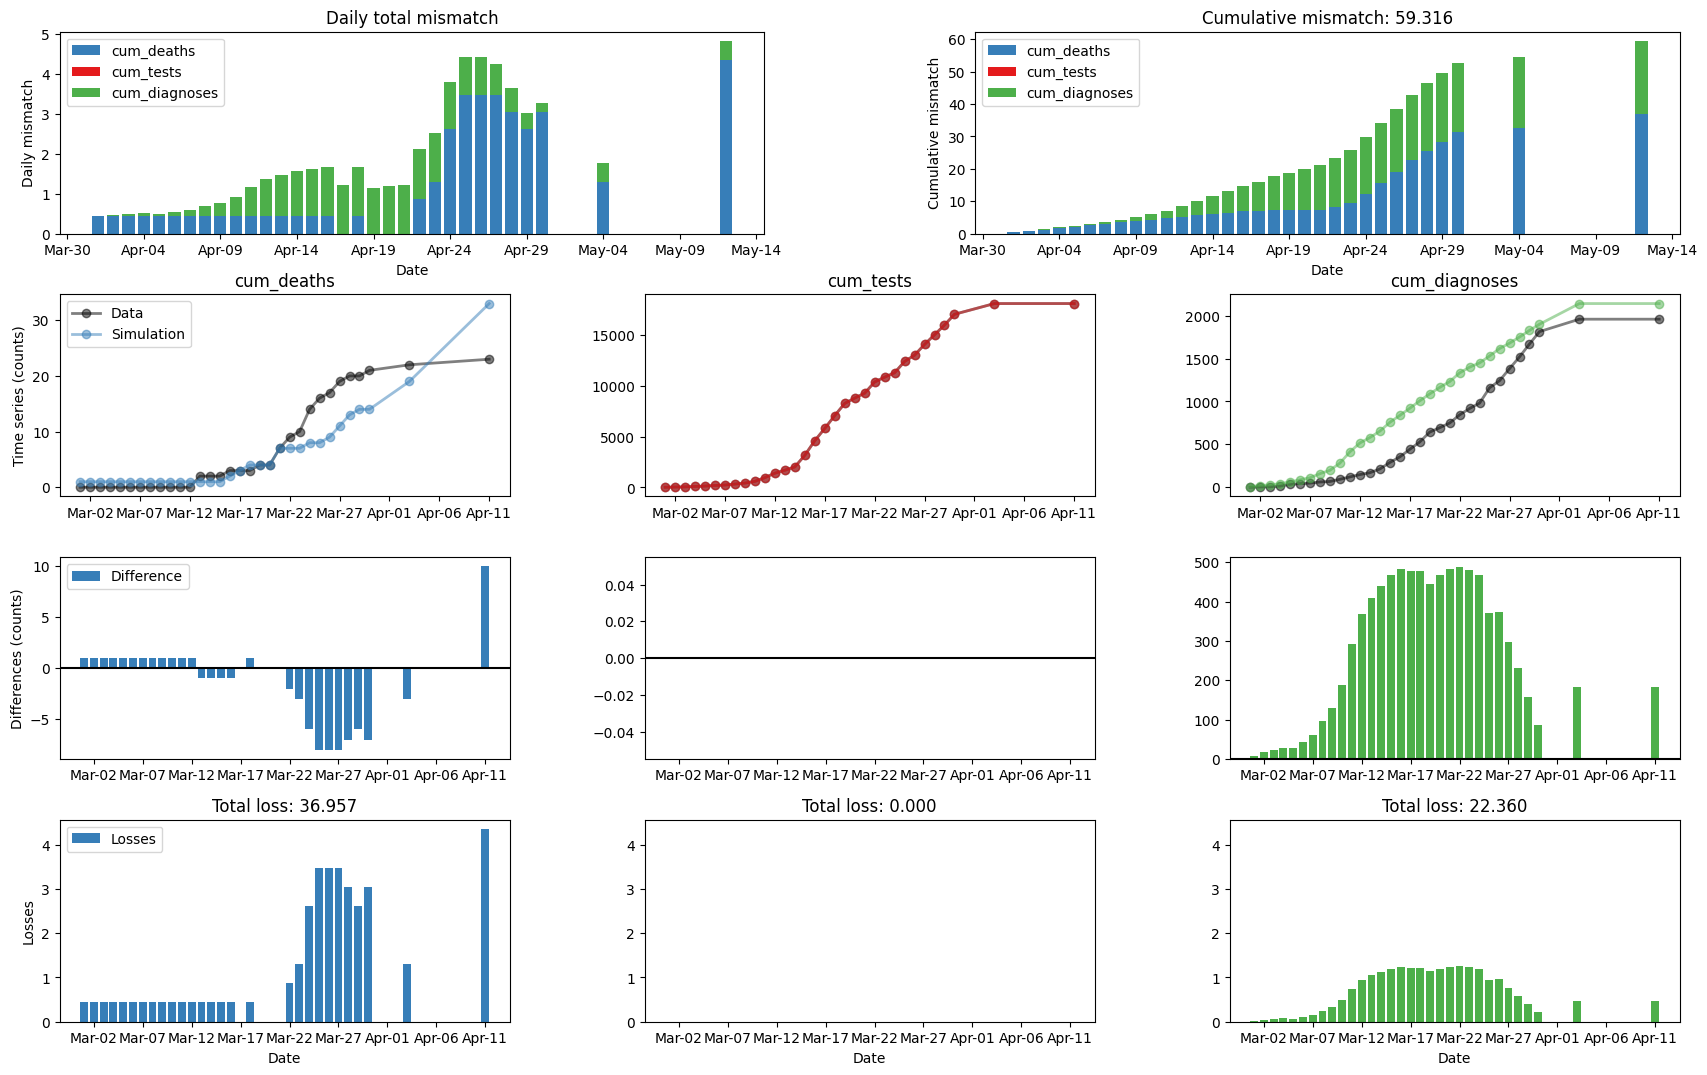

In [56]:
sim['rel_death_prob'] = 2
sim.initialize(reset=True) 
sim.run()
fit = sim.compute_fit()

# sim.plot(to_plot=['cum_tests', 'cum_diagnoses', 'cum_deaths'])
fit.plot()
print(fit.mismatches)
print(fit.mismatch)

In [51]:
df.head()

,date,new_diagnoses,new_tests,new_deaths
0,2020-03-01,1,24,0
1,2020-03-02,3,22,0
2,2020-03-03,2,15,0
3,2020-03-04,8,40,0
4,2020-03-05,20,38,0


In [54]:
sim.results['new_diagnoses'].values

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   9.,  12.,   7.,  15.,
        18.,  26.,  24.,  48.,  39.,  84., 131., 103.,  63.,  75., 102.,
        81.,  83.,  87.,  81.,  75.,  68., 102.,  66.,  50.,  80.,  87.,
        63.,  71.,  77.,  72.,   0.,   0.,   0., 241.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [58]:
import scipy

def objective(x, n_runs=10):
    print(f'Running sim for beta={x[0]}, rel_death_prob={x[1]}')
    pars = dict(
        pop_size       = 20_000,
        start_day      = '2020-02-01',
        end_day        = '2020-04-11',
        beta           = x[0],
        rel_death_prob = x[1],
        verbose        = 0,
    )
    sim = cv.Sim(pars=pars, datafile=example_data, interventions=cv.test_num(daily_tests='data'))
    msim = cv.MultiSim(sim)
    msim.run(n_runs=n_runs)
    mismatches = []
    for sim in msim.sims:
        fit = sim.compute_fit()
        mismatches.append(fit.mismatch)
    mismatch = np.mean(mismatches)
    return mismatch

guess = [0.015, 1] # Initial guess of parameters -- beta and relative death probability
pars = scipy.optimize.minimize(objective, x0=guess, method='nelder-mead') # Run the optimization

Running sim for beta=0.015, rel_death_prob=1.0
Running sim for beta=0.01575, rel_death_prob=1.0
Running sim for beta=0.015, rel_death_prob=1.05
Running sim for beta=0.014249999999999999, rel_death_prob=1.0499999999999998
Running sim for beta=0.013499999999999998, rel_death_prob=1.0749999999999997
Running sim for beta=0.014249999999999999, rel_death_prob=1.0999999999999996
Running sim for beta=0.013874999999999998, rel_death_prob=1.1499999999999995
Running sim for beta=0.013499999999999998, rel_death_prob=1.0999999999999994
Running sim for beta=0.013874999999999998, rel_death_prob=1.0874999999999995
Running sim for beta=0.014249999999999999, rel_death_prob=1.0749999999999997
Running sim for beta=0.014624999999999999, rel_death_prob=1.0749999999999997
Running sim for beta=0.014624999999999999, rel_death_prob=1.0999999999999996
Running sim for beta=0.015, rel_death_prob=1.0749999999999997
Running sim for beta=0.014437499999999999, rel_death_prob=1.0937499999999996
Running sim for beta=0.0

In [62]:
pars.x

array([0.01483246, 1.06886597])

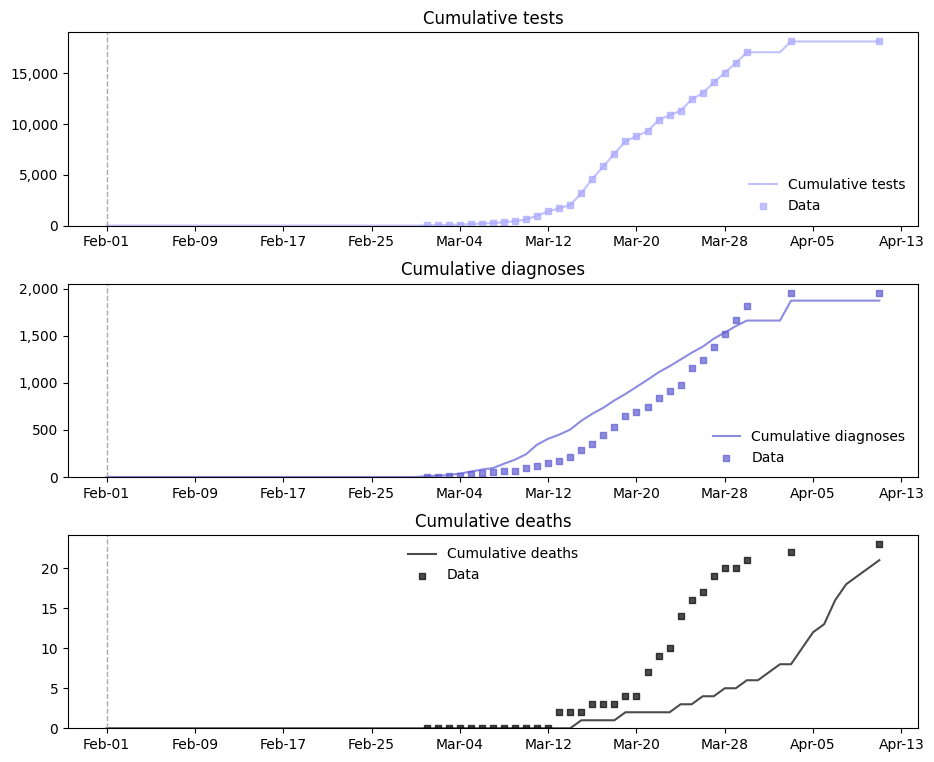

In [67]:
sim['beta'] = pars.x[0]
sim['rel_death_prob'] = pars.x[1]

sim.initialize(reset=True) 
sim.run()
fit = sim.compute_fit()
# not much improvement
sim.plot(to_plot=['cum_tests', 'cum_diagnoses', 'cum_deaths'])
# fit.plot()
# print(fit.mismatches)
# print(fit.mismatch)

In [10]:
import sciris as sc

# Create default simulation
pars = sc.objdict(
    pop_size       = 20_000,
    start_day      = '2020-02-01',
    end_day        = '2020-04-11',
    beta           = 0.015,
    rel_death_prob = 1.0,
    interventions  = cv.test_num(daily_tests='data'),
    verbose        = 0,
)
sim = cv.Sim(pars=pars, datafile=example_data)

# Parameters to calibrate -- format is best, low, high
calib_pars = dict(
    beta           = [pars.beta, 0.005, 0.20],
    rel_death_prob = [pars.rel_death_prob, 0.5, 3.0],
)

n_trials = 20
n_workers = 4
calib = sim.calibrate(calib_pars=calib_pars, n_trials=n_trials, n_workers=n_workers)


Removed existing calibration covasim_calibration.db


[I 2021-09-29 18:48:18,026] A new study created in RDB with name: covasim_calibration
[I 2021-09-29 18:48:19,260] Trial 3 finished with value: 2038.5691921659193 and parameters: {'beta': 0.10823825375300161, 'rel_death_prob': 2.4999825311880226}. Best is trial 1 with value: 136.49331616112272.
[I 2021-09-29 18:48:19,260] Trial 0 finished with value: 1496.8393880179422 and parameters: {'beta': 0.10131878451637254, 'rel_death_prob': 1.751712175360598}. Best is trial 1 with value: 136.49331616112272.
[I 2021-09-29 18:48:19,266] Trial 1 finished with value: 453.0986587911356 and parameters: {'beta': 0.055549593217458025, 'rel_death_prob': 0.6561311376561927}. Best is trial 1 with value: 136.49331616112272.
[I 2021-09-29 18:48:19,282] Trial 2 finished with value: 136.49331616112272 and parameters: {'beta': 0.01660550432390614, 'rel_death_prob': 2.1587422065075503}. Best is trial 2 with value: 136.49331616112272.
[I 2021-09-29 18:48:20,068] Trial 4 finished with value: 143.77747923790915 and

[I 2021-09-29 18:48:27,859] Trial 37 finished with value: 731.3547541857263 and parameters: {'beta': 0.024008368817338407, 'rel_death_prob': 2.4177436744077694}. Best is trial 33 with value: 116.84516143358351.
[I 2021-09-29 18:48:28,029] Trial 38 finished with value: 1288.1540613758496 and parameters: {'beta': 0.03861467119908536, 'rel_death_prob': 2.7006552381499906}. Best is trial 33 with value: 116.84516143358351.
[I 2021-09-29 18:48:28,176] Trial 39 finished with value: 1480.7081316338767 and parameters: {'beta': 0.0392428356608481, 'rel_death_prob': 2.7146163928894183}. Best is trial 33 with value: 116.84516143358351.
[I 2021-09-29 18:48:28,224] Trial 40 finished with value: 1322.1943420526713 and parameters: {'beta': 0.04071971696429108, 'rel_death_prob': 2.687651290281282}. Best is trial 33 with value: 116.84516143358351.
[I 2021-09-29 18:48:28,705] Trial 41 finished with value: 510.5580228271972 and parameters: {'beta': 0.04170497544104036, 'rel_death_prob': 0.572695575801331}

[I 2021-09-29 18:48:36,989] Trial 74 finished with value: 113.21146245059289 and parameters: {'beta': 0.012526470713192584, 'rel_death_prob': 0.8528864520444916}. Best is trial 56 with value: 45.02808988764045.
[I 2021-09-29 18:48:37,285] Trial 75 finished with value: 139.5406803748279 and parameters: {'beta': 0.010745658774690818, 'rel_death_prob': 2.6324491677660915}. Best is trial 56 with value: 45.02808988764045.
[I 2021-09-29 18:48:37,318] Trial 76 finished with value: 121.76411156015455 and parameters: {'beta': 0.010218750108876403, 'rel_death_prob': 0.7731792536160882}. Best is trial 56 with value: 45.02808988764045.
[I 2021-09-29 18:48:37,365] Trial 77 finished with value: 120.7459919172181 and parameters: {'beta': 0.011200615824372737, 'rel_death_prob': 2.6554806266841604}. Best is trial 56 with value: 45.02808988764045.
[I 2021-09-29 18:48:37,621] Trial 78 finished with value: 134.0872451925212 and parameters: {'beta': 0.010624146813167527, 'rel_death_prob': 2.659749177506817

Calibration for 80 total trials completed in 20.3 s.

Initial parameter values:
#0. beta:           0.015
#1. rel_death_prob: 1.0

Best parameter values:
#0. beta:           0.013759887347504449
#1. rel_death_prob: 2.54440996404011

Mismatch before calibration: 96.3519
Mismatch after calibration:  45.0281
Percent improvement:         53.3%


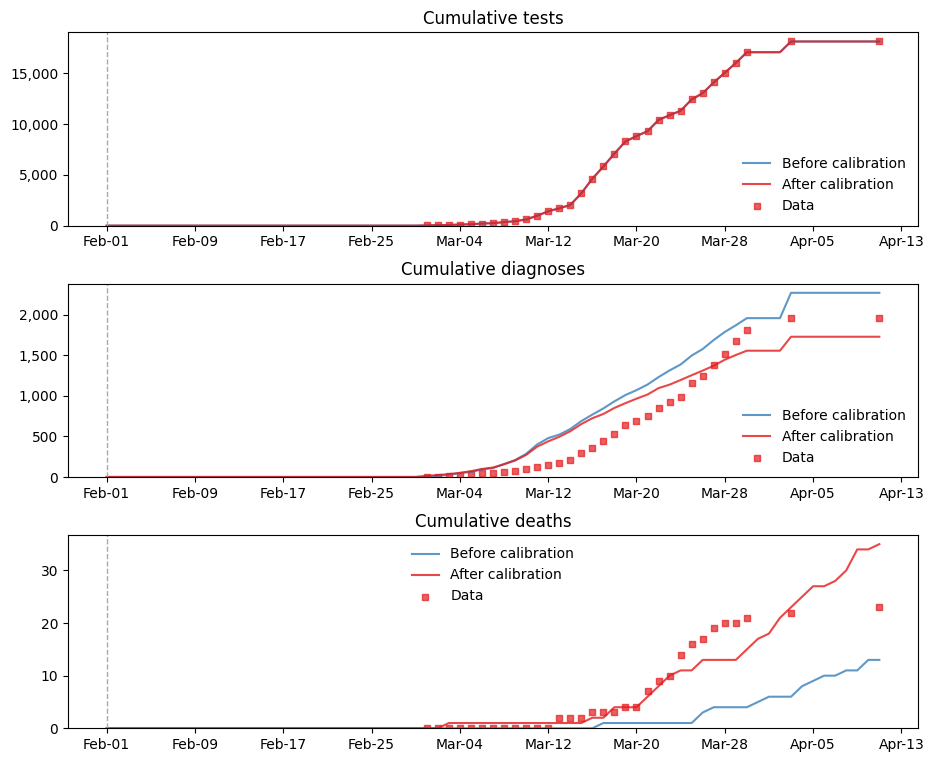

In [11]:
calib.plot(to_plot=['cum_tests', 'cum_diagnoses', 'cum_deaths'])

In [15]:
for k, d in df['new_diagnoses'].iteritems():
    print(f'{d} {k}')

1 0
3 1
2 2
8 3
20 4
9 5
6 6
13 7
6 8
25 9
28 10
27 11
22 12
43 13
76 14
65 15
88 16
86 17
115 18
51 19
55 20
95 21
74 22
63 23
178 24
83 25
140 26
137 27
150 28
144 29
145 30
0 31
